In [1]:
import numpy as np
from pandas import DataFrame as df

# Majority class base line
This notebook calculates the performance of a trivial majority class classifier as a baseline to any real models.

### Load the 3 dataset splits

In [2]:
from utils import load_dataset, public_base_dir, private_base_dir, combined_base_dir

path = combined_base_dir

val_set, _ = load_dataset('validation', base_dir=path)
test_set, _ = load_dataset('test', base_dir=path)
train_set, class_list = load_dataset('train', base_dir=path)
datasets = {'validation':val_set, 'test':test_set,'train':train_set}

Loaded validation set with 750 instances.
Loaded test set with 1250 instances.
Loaded train set with 2999 instances.


### Print class counts for each split

In [3]:
df({k:v['y'].value_counts() for k,v  in datasets.items()})

,validation,test,train
None of the above,267,445,1067
Acting or Performing machine,168,281,674
Collaborative or Interactive AI,109,182,438
Thinking machine,94,156,373
Complex AI,87,145,347
Mysterious AI,13,21,50
Superior human,8,14,34
Learning or recognition machine,4,6,16


Some of these counts are horrible. The number of examples in 'Learning or recognition machine', 'Superior human' and 'Mysterious AI' are really to small. Also, the 'None of the above' class is very large, although that's not really a problem.

### Show some images of each class

In [4]:
from utils import combined_base_dir
import ipywidgets as widgets
import IPython.display as display

def plot_images_from_class(cls, n=5):
    print(cls)
    current_dir = combined_base_dir / 'train' / (cls)
    all_image_paths = [f for f in current_dir.iterdir()]
    n_image_paths = np.random.choice(all_image_paths, n, replace=False)
    file_objs = [open(path, 'rb').read() for path in n_image_paths]
    im_widgets = [widgets.Image(value=f, format='jpg', width=150, height=150) for f in file_objs]
    side_by_side = widgets.HBox(im_widgets)
    display.display(side_by_side)

for cls in class_list:
    #plot_images_from_class(cls)  # Don't commit this output to repo!
    pass

### Performance metrics for majority vote baseline

In [5]:
predicted = ['None of the above' for _ in val_set['y']]
trues = val_set['y'].values

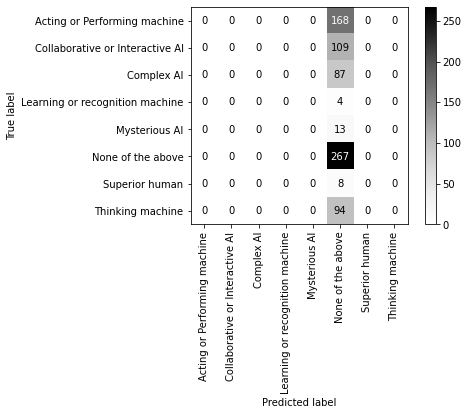

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(trues, predicted)
#df(confusion, columns=[cls[:8] for cls in class_list], index=class_list)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,                               display_labels=class_list)
_ = disp.plot(cmap='Greys', xticks_rotation='vertical')


In [7]:
from utils import print_performance_metrics

print_performance_metrics(trues, predicted, class_list)


accuracy_score 0.356
recall_score [0. 0. 0. 0. 0. 1. 0. 0.]
precision_score [0.    0.    0.    0.    0.    0.356 0.    0.   ]
f1_score [0.         0.         0.         0.         0.         0.52507375
 0.         0.        ]
krippendorff.alpha -0.20868584778964472


C:\Users\ChristiaanMeijer\anaconda3\envs\robot\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
